In [1]:
%load_ext autoreload
%autoreload 2

# Random effects model

$y_{i,t} = \alpha_i + \beta_i x_{t-1,i} + \gamma_i w_{t-1} + \epsilon_{t,i}$

$\alpha_i = \alpha_0 + \eta_{\alpha_i}$

$\beta_i = \beta_0 + \eta_{\beta_i}$

$\gamma_i = \gamma_0 + \eta_{\gamma_i}$

$\alpha_0 \sim \mathcal{N}(0, \tau_\alpha)$

$\beta_0 \sim \mathcal{N}(0, \tau_\beta)$

$\gamma_0 \sim \mathcal{N}(0, \tau_\gamma)$

$\eta_{\alpha_i} \sim \mathcal{N}(0, \tau_{\eta_\alpha})$

$\eta_{\beta_i} \sim \mathcal{N}(0, \tau_{\eta_\beta})$

$\eta_{\gamma_i} \sim \mathcal{N}(0, \tau_{\eta_\gamma})$

$\tau_\alpha, \tau_\beta, \tau_\gamma, \tau_{\eta_\alpha}, \tau_{\eta_\beta}, \tau_{\eta_\gamma} \sim \Gamma(1,1)$

In [2]:
import pandas as pd
from seminartools.data import read_inflation, read_merged

In [3]:
df = read_merged()
df

,,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
country,date,,,,,,,,,
Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...
Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [4]:
from seminartools.models.distance_model import DistanceModel

model = DistanceModel()
model

In [30]:
model.fit(df)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8, 20) and arg 1 with shape (8,).
Apply node that caused the error: normal_rv{0, (0, 0), floatX, False}(RandomGeneratorSharedVariable(<Generator(PCG64) at 0x7F458D3CF300>), [ 8 20], 11, regression_coefficient_mean, Composite{(reciprocal(sqrt(abs(i0))) * sign(i0))}.0)
Toposort index: 5
Inputs types: [RandomGeneratorType, TensorType(int64, shape=(2,)), TensorType(int64, shape=()), TensorType(float64, shape=(8,)), TensorType(float64, shape=())]
Inputs shapes: ['No shapes', (2,), (), (8,), ()]
Inputs strides: ['No strides', (8,), (), (8,), ()]
Inputs values: [Generator(PCG64) at 0x7F458D3CF300, array([ 8, 20]), array(11), 'not shown', array(0.52303041)]
Outputs clients: [[], ['output']]

Backtrace when the node is created (use PyTensor flag traceback__limit=N to make it longer):
  File "/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
    if await self.run_code(code, result, async_=asy):
  File "/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_3169473/486985857.py", line 1, in <module>
    model.fit(df)
  File "/home/maurits/private/seminar/seminartools/models/distance_model.py", line 113, in fit
    regression_coefficients = pm.Normal(
  File "/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/pymc/distributions/distribution.py", line 314, in __new__
    rv_out = cls.dist(*args, **kwargs)
  File "/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/pymc/distributions/continuous.py", line 521, in dist
    return super().dist([mu, sigma], **kwargs)
  File "/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/pymc/distributions/distribution.py", line 393, in dist
    rv_out = cls.rv_op(*dist_params, size=create_size, **kwargs)

HINT: Use the PyTensor flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.

# Analyze covariance matrix prior

<Axes: >

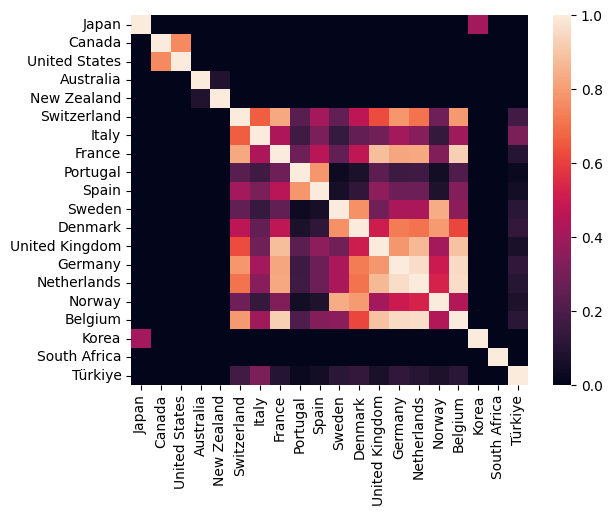

In [ ]:
import seaborn as sns
import numpy as np

x = pd.DataFrame(x, index=model.countries, columns=model.countries)
sns.heatmap(x)